<a href="https://colab.research.google.com/github/MorningstarDeep/Plant-Species-Classfication/blob/main/Plant_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
########################################################################
# This notebook demonstrates weight Prunnig                            #
# Framework used is tensorflow                                         #
########################################################################

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter
import os


In [3]:
## Defining batch specfications
batch_size = 100
img_height = 250
img_width = 250

In [4]:
# Install the Kaggle package
!pip install -q kaggle

# Upload kaggle.json file (run this and manually upload the file)
from google.colab import files
files.upload()

# Make a directory for Kaggle and move the uploaded file there
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset from Kaggle (you can replace the dataset URL or ID if needed)
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

# Unzip the dataset
!unzip new-plant-diseases-dataset.zip -d plant_diseases_dataset


Streaming output truncated to the last 5000 lines.
  inflating: plant_diseases_dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: plant_diseases_dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: plant_diseases_dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: plant_diseases_dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: plant_diseases_dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c

In [5]:
## loading training set
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/plant_diseases_dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 70295 files belonging to 38 classes.


In [7]:
## loading validation dataset
validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    '/content/plant_diseases_dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 17572 files belonging to 38 classes.


In [8]:
class_names = training_ds.class_names

In [9]:
## Defining Cnn
MyCnn = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])


In [10]:
MyCnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
## lets train our CNN
retVal = MyCnn.fit(training_ds,validation_data= validation_ds,epochs = 5)

Epoch 1/5
703/703 ━━━━━━━━━━━━━━━━━━━━ 189s 239ms/step - accuracy: 0.5800 - loss: 1.5865 - val_accuracy: 0.8429 - val_loss: 0.4990
Epoch 2/5
703/703 ━━━━━━━━━━━━━━━━━━━━ 164s 210ms/step - accuracy: 0.8997 - loss: 0.3148 - val_accuracy: 0.9062 - val_loss: 0.2909
Epoch 3/5
703/703 ━━━━━━━━━━━━━━━━━━━━ 201s 208ms/step - accuracy: 0.9533 - loss: 0.1429 - val_accuracy: 0.9090 - val_loss: 0.2948
Epoch 4/5
703/703 ━━━━━━━━━━━━━━━━━━━━ 203s 209ms/step - accuracy: 0.9720 - loss: 0.0841 - val_accuracy: 0.9087 - val_loss: 0.3351
Epoch 5/5
703/703 ━━━━━━━━━━━━━━━━━━━━ 201s 207ms/step - accuracy: 0.9751 - loss: 0.0742 - val_accuracy: 0.9264 - val_loss: 0.2913


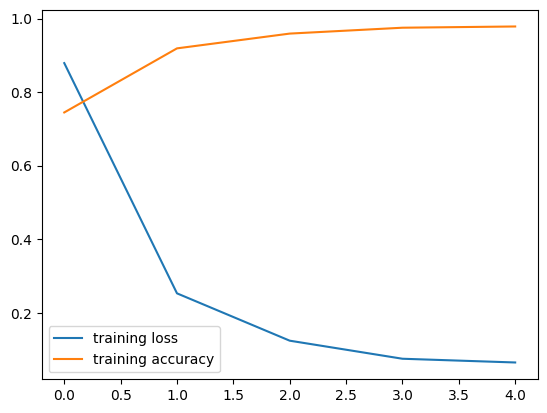

In [12]:
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.legend()

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 341ms/step


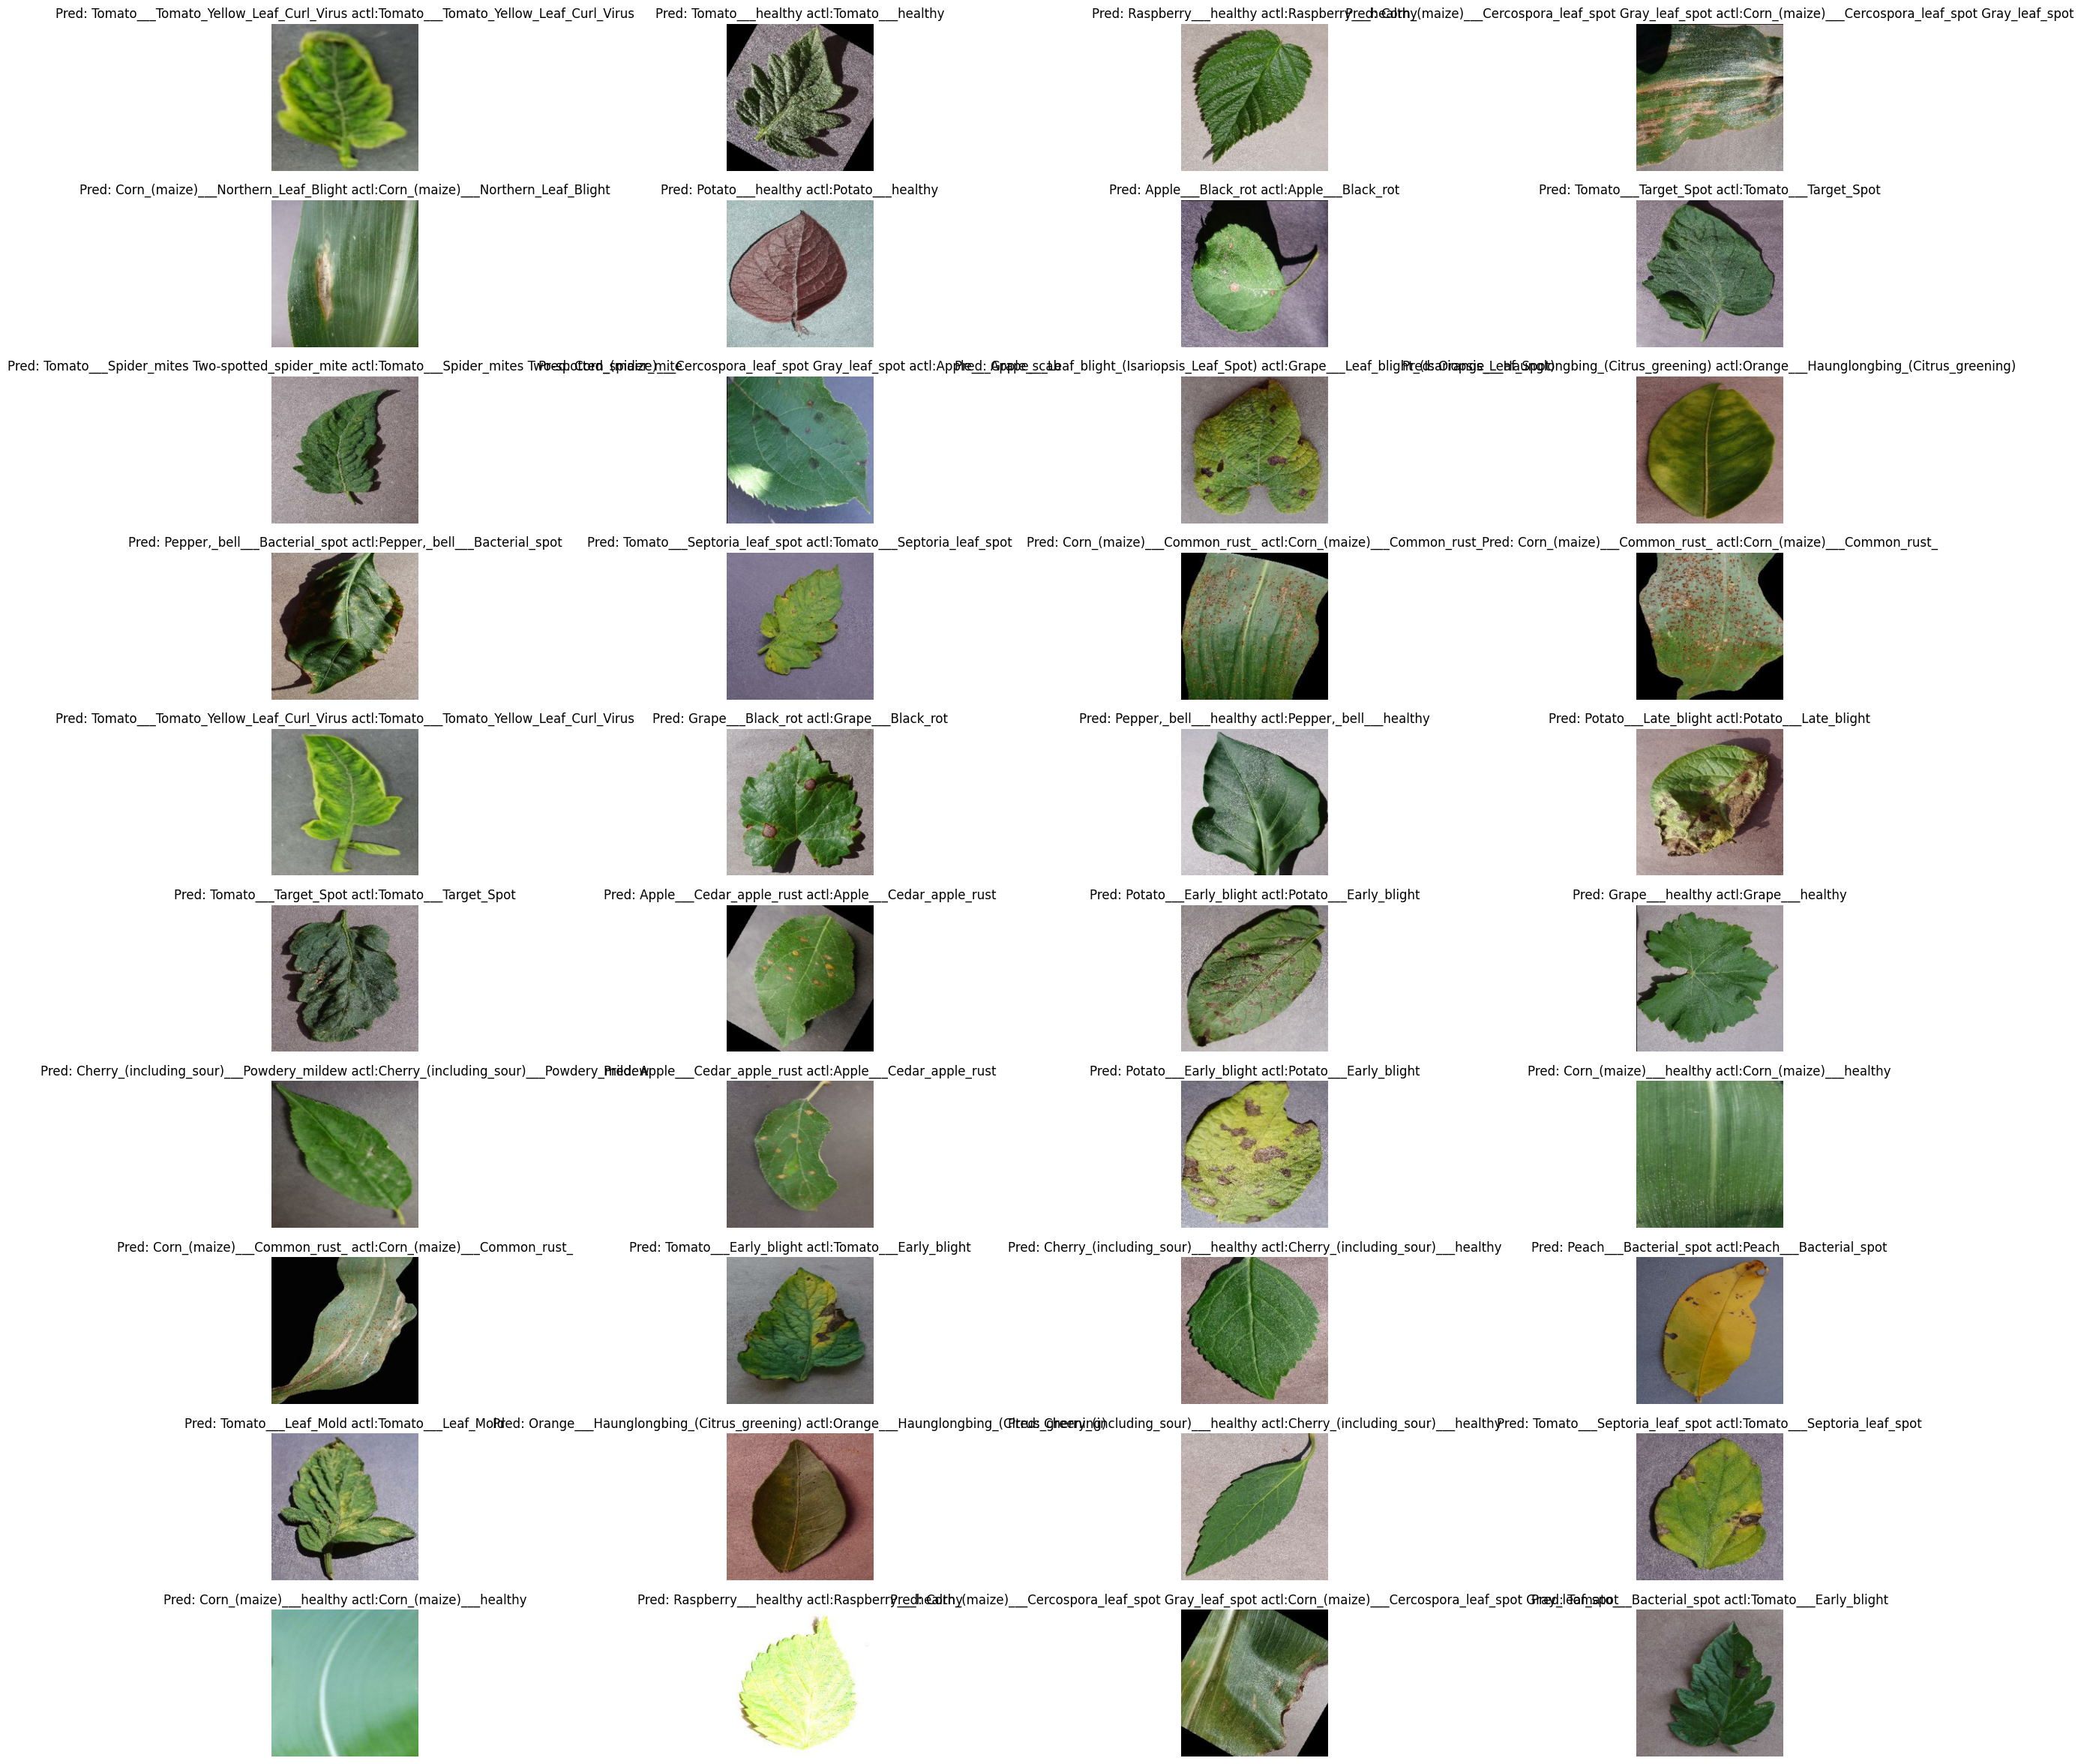

In [13]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in validation_ds.take(1):
    predictions = MyCnn.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))

    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

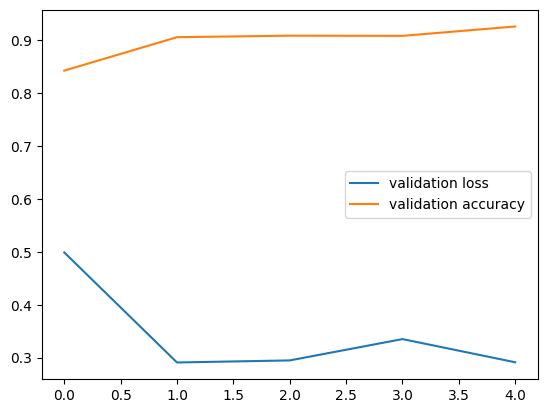

In [14]:
plt.plot(retVal.history['val_loss'], label = 'validation loss')
plt.plot(retVal.history['val_accuracy'], label = 'validation accuracy')
plt.legend()

In [16]:
MyCnn.save('model.h5')

In [17]:
#####################################################################
# lets now see time taken and validation accuracy and model size    #
#####################################################################
start = perf_counter()
_, unPrunnedAccuracy = MyCnn.evaluate(validation_ds, verbose = 0 )
end = perf_counter()

sizeUnprunned = os.path.getsize('model.h5')
# let convert to MB
sizeUnprunned = sizeUnprunned / (1024 * 1024)

print ('unPrunned model Summary:')
print('Model size(MB) : {}'.format(sizeUnprunned))
print('Time on Validation data (sec) : {}'.format(end - start))
print('Accuracy on validation data: {}'.format(unPrunnedAccuracy))

unPrunned model Summary:
Model size(MB) : 316.6107635498047
Time on Validation data (sec) : 21.935002053000062
Accuracy on validation data: 0.9264170527458191


Saving Potato-leaf-blight.jpg to Potato-leaf-blight.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


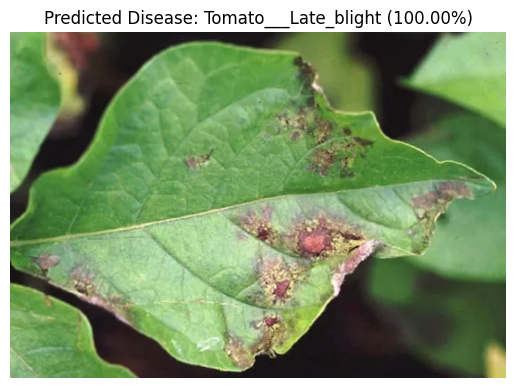

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from google.colab import files
import os

# Load the trained model
model = load_model('model.h5')

# Path to your dataset (where the folders of diseases are located)
dataset_path = '/content/plant_diseases_dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'

# Dynamically extract class labels from the folder names
class_labels = sorted([disease_name for disease_name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, disease_name))])

def preprocess_image(img_path):
    """Preprocess the input image based on the model's input shape."""

    # Check the expected input shape for the model
    input_shape = model.input_shape[1:3]  # Extract expected input size, e.g., (224, 224)

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=input_shape)  # Resize to match model's input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image (rescale pixel values)

    return img_array

def predict_disease(img_path):
    """Predict the disease from the input image."""

    # Preprocess the image
    preprocessed_img = preprocess_image(img_path)

    # Make a prediction using the loaded model
    predictions = model.predict(preprocessed_img)

    # Get the index of the class with the highest probability
    predicted_class_index = np.argmax(predictions)

    # Get the disease label and confidence percentage based on the predicted class index
    predicted_disease = class_labels[predicted_class_index]
    confidence = predictions[0][predicted_class_index] * 100  # Convert to percentage

    return predicted_disease, confidence

# Function to upload an image
def upload_image():
    """Upload an image and return the image path."""
    uploaded = files.upload()

    # Get the uploaded file name
    for filename in uploaded.keys():
        return filename  # Return the first uploaded file name

# Main code execution
image_path = upload_image()  # Upload the image
predicted_disease, confidence = predict_disease(image_path)  # Predict the disease

# Display the uploaded image
img = image.load_img(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.title(f"Predicted Disease: {predicted_disease} ({confidence:.2f}%)")
plt.show()
